In [1]:
import pandas as pd

from sqlalchemy import create_engine

ck_properties_master = {  # clickhouse 数据库配置
    # "driver": "com.github.housepower.jdbc.ClickHouseDriver",
    "driver": "ru.yandex.clickhouse.ClickHouseDriver",
    "socket_timeout": "300000",
    "rewriteBatchedStatements": "true",
    "batchsize": "1000000",
    "numPartitions": "8",
    "user": "default",
    "password": "",
    "host": "10.129.165.72",
    "database": 'sdecdmp',
    "port": 8123
}

ck_engine_master = create_engine(
    f"clickhouse://{ck_properties_master['user']}:@{ck_properties_master['host']}:{ck_properties_master['port']}/{ck_properties_master['database']}"
)

      fuel_level
0           30.0
1           30.0
2           30.0
3           30.0
4           30.0
...          ...
53997        0.0
53998        0.0
53999        0.0
54000        0.0
54001        0.0

[54002 rows x 1 columns]


/home/qjy20472/miniconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/qjy20472/miniconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/qjy20472/miniconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/qjy20472/miniconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


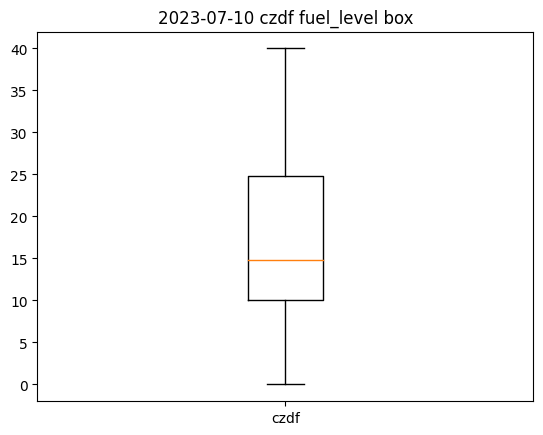

In [7]:
# 画出随机一天czdf 油箱液位箱线图
from sqlalchemy import text

date = '2023-07-10'
sc = 'SAE_S00096'
fuel_level_nosql_df = pd.read_sql(
    sql=text(
        f"""
        select
                case
                    when indexOf(code,'{sc}')>0 then parse_value[indexOf(code,'{sc}')]
                end as fuel_level
        from
            sdecdmp.signal_data_nosql_all
        where
            clt_date = '{date}' and data_source = 'czdf'
        """
    ),
    con=ck_engine_master
)
fuel_level_nosql_df.loc[:, 'fuel_level'] = fuel_level_nosql_df['fuel_level'].astype(float)
print(fuel_level_nosql_df)

import matplotlib.pyplot as plt

plt.boxplot(fuel_level_nosql_df['fuel_level'], labels=['czdf'])
plt.title('2023-07-10 czdf fuel_level box')
plt.show()